In [3]:
import numpy as np
import torch
from torch.nn import Linear

In [4]:
#Set random seed
torch.manual_seed(1)

In [5]:
lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w & b:", list(lr.parameters()))

Parameters w & b: [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [6]:
lr.state_dict()

OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])

In [7]:
print("Weight:", lr.weight)
print("Bias:", lr.bias)

Weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


In [8]:
# Creating the predication using the linear model
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The predictions:", yhat)

The predictions: tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


<h2>Building Custom Models</h2>
<p>Custom Models are helpful in building more complex models</p>

In [9]:
from torch import nn
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = Linear(in_features=input_size, out_features=output_size)
    
    def forward(self, x):
        return self.linear(x)

In [10]:
lr = LR(1, 1)
print("Parameters:", list(lr.parameters()))
print("Linear Model:", lr.linear)

Parameters: [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Linear Model: Linear(in_features=1, out_features=1, bias=True)


In [11]:
x = torch.tensor([[1.0], [2.0], [3.0]])
lr1 = LR(1, 1)
yhat = lr(x)
print("Predictions:", yhat)

Predictions: tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward0>)


<h1>Linear Regression using One Parameter</h1>

<h4>Plotting Training Data</h4>

In [12]:
import matplotlib.pyplot as plt

class plot_diagram():
    
    #Constructor
    def __init__(self, x, y, w, stop, go=False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(x.numpy()))
        self.x = x.numpy()
        
        self.y = y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.loss_function = [criterion(forward(x), y) for w.data in self.parameter_values]
    
    #Executor
    def __call__(self, yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.x, yhat.detach().numpy())
        plt.plot(self.x, self.y, 'ro') #'ro' is a format string specifying the plot style, r=Color red, o=Marker style which is circle; ro will create plot with red circles as data points
        plt.xlabel('A')
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        
        #Convert lists to pytorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.Tensor(self.loss_function)
        
        #Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel('B')
        plt.figure()
    
    #Destructor
    def __del__(self):
        plt.close('all')

In [13]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*x

Plotting the line

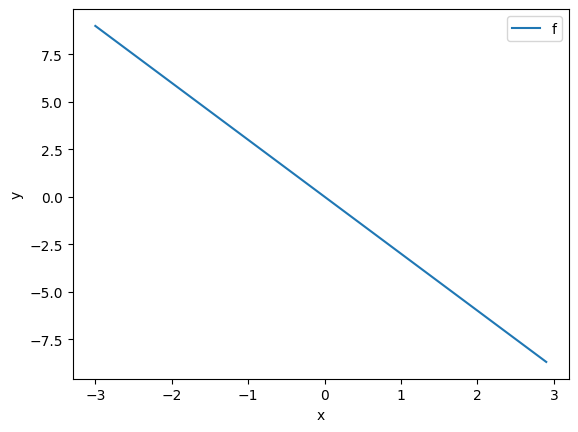

In [14]:
plt.plot(x.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Adding some noise

In [15]:
y = f + 0.1 * torch.randn(x.size())
# randn Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution)

Plot y

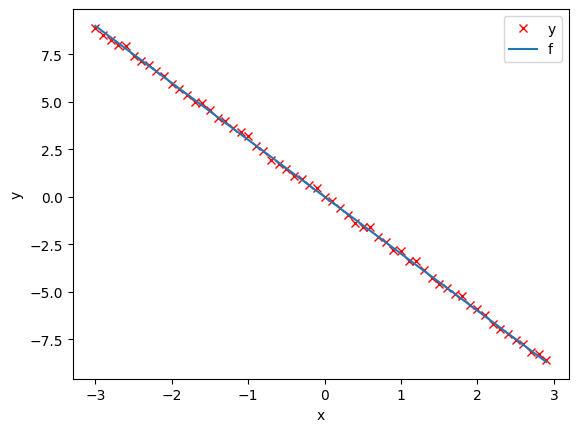

In [18]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y') #'rx' = Red crosses

plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3>Create the Model and Cost Function</h3>

In [19]:
def forward(x):
    return w*x

Creating the cost / criterion function

In [20]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [21]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [22]:
w = torch.tensor(-10.0, requires_grad=True)

Create a <code>Plot Diagram</code> to visualize data during training

In [23]:
gradient_plot = plot_diagram(x, y, w, stop=5)

<class 'numpy.ndarray'>


Train the model

In [24]:
def train_model(iter):
    for epoch in range(iter):
        yhat = forward(x) #Predication
        loss =  criterion(yhat, y) #Loss function
        gradient_plot(yhat, w, loss.item(), epoch) #Plot the diagram
        
        LOSS.append(loss.item()) # Store loss into the list
        
        # Compute gradient of the loss w.r.t. all the learnable parameters
        loss.backward()
        
        # Update parameters
        w.data = w.data - lr * w.grad.data
        
        #Zero the gradients
        w.grad.data.zero_()

Let us try to run 4 iterations

C:\Users\Piyush\AppData\Local\Temp\ipykernel_18248\388278676.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


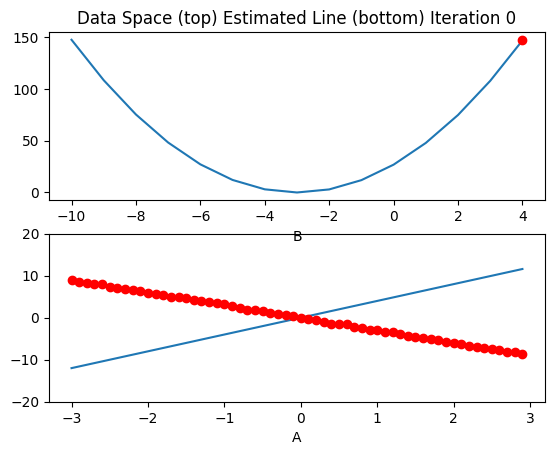

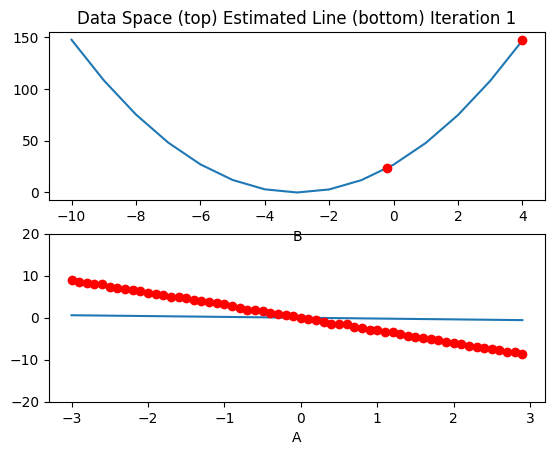

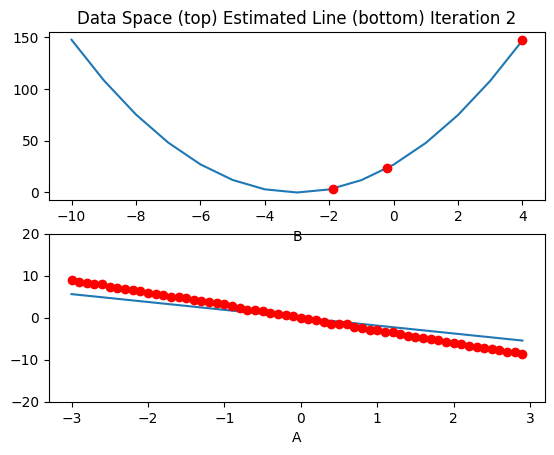

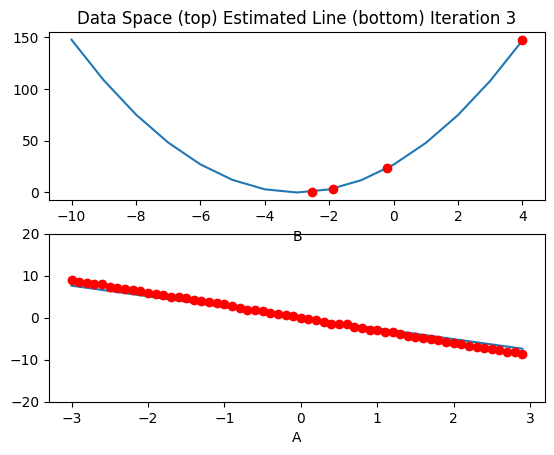

<Figure size 640x480 with 0 Axes>

In [25]:
train_model(4)

Plot the cost for each iteration

Text(38.347222222222214, 0.5, 'Cost')

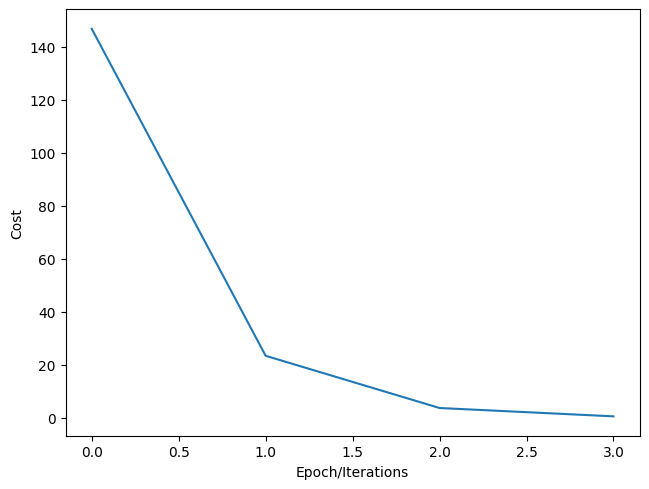

In [26]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")